
#Import Library




In [167]:
import pandas as pd

In [168]:
import seaborn as sns

In [169]:
import matplotlib.pyplot as plt

In [170]:
import numpy as np


#Import Data




In [171]:
df=pd.read_csv('https://github.com/SanikaVT/Liver-disease-prediction/raw/master/indian_liver_patient.csv')

In [172]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [173]:
df.nunique()

Age                            72
Gender                          2
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          263
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     69
Dataset                         2
dtype: int64

#Data Preprocessing



In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [175]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [176]:
df.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


In [177]:
df.shape

(583, 11)

In [178]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

#Data Cleaning

In [179]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool

In [180]:
df.duplicated().sum()

13

In [181]:
df.duplicated().sum()
df.shape

(583, 11)

#Checking Missing Values

Fill missing values by finding mean, median and mode of that row

In [182]:
df.dropna()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [184]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [185]:
df['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815201

In [186]:
df['Albumin_and_Globulin_Ratio'].mode()

0    1.0
dtype: float64

In [187]:
df['Albumin_and_Globulin_Ratio'].median()

0.93

In [188]:
df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median())

In [189]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

#Data Visualization

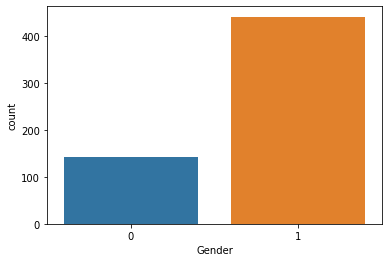

In [190]:
sns.countplot(data=data,x='Gender',label='count')

In [191]:
male,female= df['Gender'].value_counts()

In [192]:
print('males:',male)

males: 441


In [193]:
print('female:',female)

female: 142


In [194]:
def partition(x):
    if x=='Male':
        return 1
    return 0

In [195]:
df['Gender']=df['Gender'].map(partition)

In [196]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [197]:
def partition(x):
  if x==2:
    return 0
  return 1

In [198]:
df['Dataset']=df['Dataset'].map(partition)

In [199]:
df['Dataset']

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 583, dtype: int64

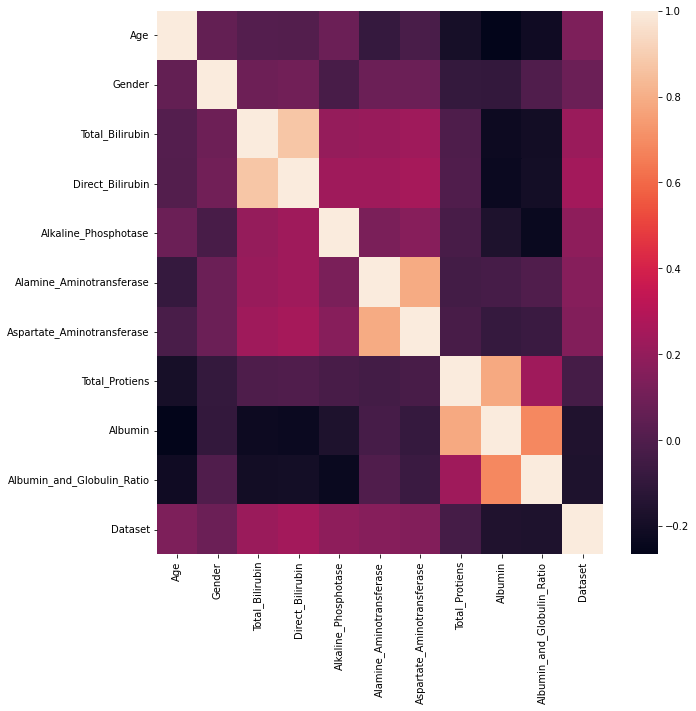

In [200]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

#Data Preparation

In [201]:
from re import X
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [202]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state= 162529)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((437, 10), (146, 10), (437,), (146,))

In [203]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

#Machine Learning Models

Logistic Regression

In [204]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression(random_state = 162529)
log_classifier.fit(x_train,y_train)

LogisticRegression(random_state=162529)

In [205]:
log_y_pred=log_classifier.predict(x_test)

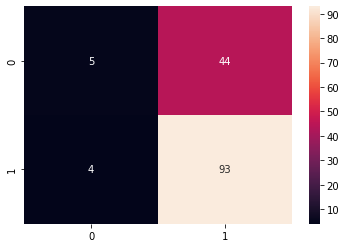

In [206]:
from sklearn.metrics import confusion_matrix
log_cm=confusion_matrix(y_test,log_y_pred)
sns.heatmap(log_cm,annot=True)

In [207]:
from sklearn.metrics import accuracy_score,precision_score
print(accuracy_score(y_test,log_y_pred))
print(precision_score(y_test,log_y_pred))

0.6712328767123288
0.6788321167883211


#K Nearest Neighbour

In [208]:
x_train.shape

(437, 10)

In [209]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors=21,metric='minkowski')
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [210]:
knn_y_pred=knn_classifier.predict(x_test)

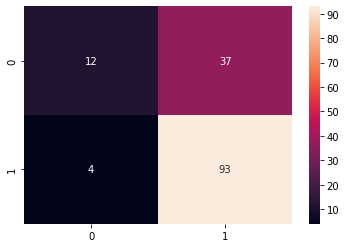

In [211]:
from sklearn.metrics import confusion_matrix
knn_cm=confusion_matrix(y_test,knn_y_pred)
sns.heatmap(knn_cm,annot=True)

In [212]:
from sklearn.metrics import accuracy_score,precision_score
print(accuracy_score(y_test,knn_y_pred))
print(precision_score(y_test,knn_y_pred))

0.7191780821917808
0.7153846153846154


SVM

In [213]:
from sklearn.svm import SVC
svm_classifier=SVC(kernel='rbf',random_state= 162529)
svm_classifier.fit(x_train,y_train)

SVC(random_state=162529)

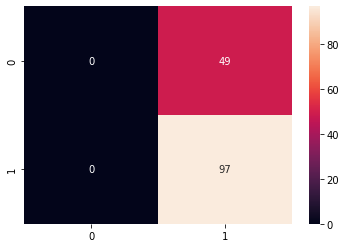

In [214]:
svm_y_pred=svm_classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
svm_cm=confusion_matrix(y_test,svm_y_pred)
sns.heatmap(svm_cm,annot=True)

In [215]:
from sklearn.metrics import accuracy_score,precision_score
print(accuracy_score(y_test,svm_y_pred))
print(precision_score(y_test,svm_y_pred))

0.6643835616438356
0.6643835616438356


In [216]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [217]:
classifier=Sequential()
classifier.add(Dense(units=400,activation='relu',input_dim= 10))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=400,activation='relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units=1,activation='sigmoid'))

In [218]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [219]:
classifier.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 5ms/step - loss: 0.5799 - accuracy: 0.7140
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5151 - accuracy: 0.7368
Epoch 3/100
14/14 [==============================] - 0s 7ms/step - loss: 0.5007 - accuracy: 0.7437
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4936 - accuracy: 0.7437
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4907 - accuracy: 0.7574
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4885 - accuracy: 0.7437
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4728 - accuracy: 0.7597
Epoch 8/100
14/14 [==============================] - 0s 6ms/step - loss: 0.4685 - accuracy: 0.7574
Epoch 9/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4658 - accuracy: 0.7551
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4698 - accuracy: 0.7506
Epoch 11/

In [220]:
ann_y_pred=classifier.predict(x_test)
ann_y_pred[0]

array([0.9999958], dtype=float32)

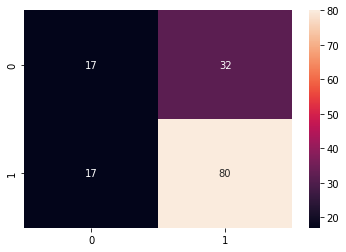

In [221]:
ann_y_pred=ann_y_pred>=0.5
from sklearn.metrics import confusion_matrix
ann_cm=confusion_matrix(y_test,ann_y_pred)
sns.heatmap(ann_cm,annot=True)

In [222]:
from sklearn.metrics import accuracy_score,precision_score
print(accuracy_score(y_test,ann_y_pred))
print(precision_score(y_test,ann_y_pred))

0.6643835616438356
0.7142857142857143


In [223]:
import pickle
pickle.dump(knn_classifier,open('model.pkl','wb'))
pickle.dump(sc,open('sc.pkl','wb'))